In [7]:
#Deleting unneccessary features from the spofify_songs.csv dataset which are: 'track_album_id', 'playlist_name', 'playlist_id'
import pandas as pd

# Load the dataset
file_path = 'spotify_songs.csv'  # Update this path if your file is located elsewhere
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure (optional)
print("Original DataFrame:")
print(df.head())

# Delete the specified columns
columns_to_delete = ['track_album_name','track_album_id', 'playlist_name', 'playlist_id']
df.drop(columns=columns_to_delete, inplace=True)

# Display the first few rows of the modified dataframe to verify changes (optional)
print("\nDataFrame after dropping specified columns:")
print(df.head())

# Optionally, save the modified dataframe to a new CSV file
output_file_path = 'modified_spotify_songs.csv'
df.to_csv(output_file_path, index=False)

print(f"\nModified DataFrame saved to {output_file_path}")


Original DataFrame:
                 track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justi

In [8]:
#see all the possible playlist_genre and playlist_subgenre values
file_path = 'modified_spotify_songs.csv'  # Update this path if your file is located elsewhere
df = pd.read_csv(file_path)

# Get unique values in 'playlist_genre' and 'playlist_subgenre' columns
unique_genres = df['playlist_genre'].unique()
unique_subgenres = df['playlist_subgenre'].unique()

# Display the unique values
print("Unique playlist genres:")
print(unique_genres)

print("\nUnique playlist subgenres:")
print(unique_subgenres)

Unique playlist genres:
['pop' 'rap' 'rock' 'latin' 'r&b' 'edm']

Unique playlist subgenres:
['dance pop' 'post-teen pop' 'electropop' 'indie poptimism' 'hip hop'
 'southern hip hop' 'gangster rap' 'trap' 'album rock' 'classic rock'
 'permanent wave' 'hard rock' 'tropical' 'latin pop' 'reggaeton'
 'latin hip hop' 'urban contemporary' 'hip pop' 'new jack swing'
 'neo soul' 'electro house' 'big room' 'pop edm'
 'progressive electro house']


In [9]:
# Get the highest and lowest track popularity values
highest_popularity = df['track_popularity'].max()
lowest_popularity = df['track_popularity'].min()

# Display the results
print(f"Highest track popularity value: {highest_popularity}")
print(f"Lowest track popularity value: {lowest_popularity}")

Highest track popularity value: 100
Lowest track popularity value: 0


In [10]:
import matplotlib.pyplot as plt

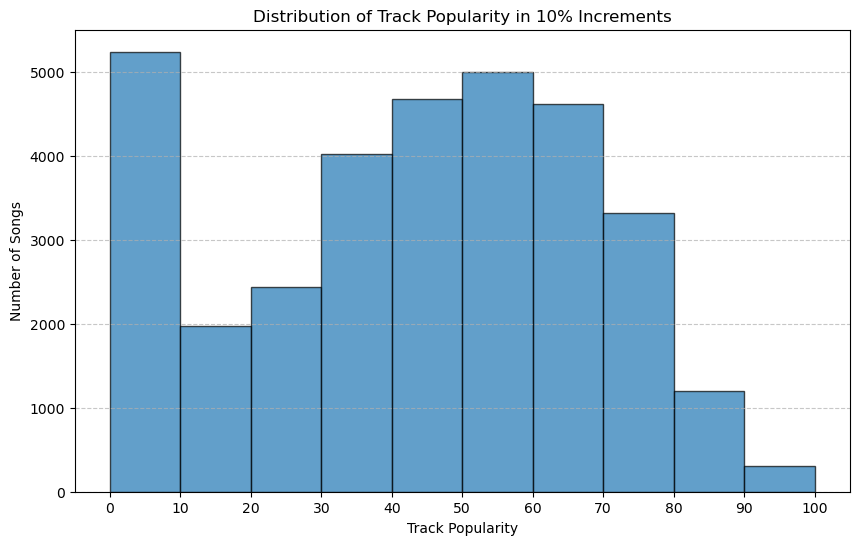

In [12]:
#seeing the distribution of the song by track_popularity
# Define the bin edges for 10% increments
bins = [i for i in range(0, 101, 10)]

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['track_popularity'], bins=bins, edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Distribution of Track Popularity in 10% Increments')
plt.xlabel('Track Popularity')
plt.ylabel('Number of Songs')
plt.xticks(bins)  # Set the x-ticks to match the bin edges

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [18]:
#delete all the songs with track_popularity=0

# Filter the DataFrame to remove songs with track_popularity=0
df = df[df['track_popularity'] != 0]

# Display the updated DataFrame
print("DataFrame after deleting songs with track_popularity=0:")
print(df)

DataFrame after deleting songs with track_popularity=0:
                     track_id  \
0      6f807x0ima9a1j3VPbc7VN   
1      0r7CVbZTWZgbTCYdfa2P31   
2      1z1Hg7Vb0AhHDiEmnDE79l   
3      75FpbthrwQmzHlBJLuGdC7   
4      1e8PAfcKUYoKkxPhrHqw4x   
...                       ...   
32828  7bxnKAamR3snQ1VGLuVfC1   
32829  5Aevni09Em4575077nkWHz   
32830  7ImMqPP3Q1yfUHvsdn7wEo   
32831  2m69mhnfQ1Oq6lGtXuYhgX   
32832  29zWqhca3zt5NsckZqDf6c   

                                              track_name      track_artist  \
0      I Don't Care (with Justin Bieber) - Loud Luxur...        Ed Sheeran   
1                        Memories - Dillon Francis Remix          Maroon 5   
2                        All the Time - Don Diablo Remix      Zara Larsson   
3                      Call You Mine - Keanu Silva Remix  The Chainsmokers   
4                Someone You Loved - Future Humans Remix     Lewis Capaldi   
...                                                  ...               ...   
3

In [37]:
#with the songs of having same track_name and same track_artist delete the one with the lowest track_popularity. 


# Sort the dataframe by track_popularity in descending order
df.sort_values(by='track_popularity', ascending=False, inplace=True)

# Drop duplicates based on track_name and track_artist, keeping the first occurrence (highest track_popularity)
df.drop_duplicates(subset=['track_name', 'track_artist'], keep='first', inplace=True)

# Save the modified dataframe to a new CSV file
df.to_csv('modified_spotify_songs_unique.csv', index=False)


In [38]:
#check if there will be more than one element with same track_name and track_artist that we used to have before 

# Filter the DataFrame for songs with track_name "Dynamite" and track_artist "Gareth Emery"
file_path = 'modified_spotify_songs_unique.csv'  # Update this path if your file is located elsewhere
df = pd.read_csv(file_path)

filtered_df = df[(df['track_name'] == 'Cool') & (df['track_artist'] == 'Alesso')]

# Display the filtered DataFrame
print("Songs with Track Name 'Cool' and Track Artist 'Alesso':")
print(filtered_df)

Songs with Track Name 'Cool' and Track Artist 'Alesso':
                    track_id track_name track_artist  track_popularity  \
5881  2ToIksTPpJ4csKPEOdUEyM       Cool       Alesso                60   

     track_album_release_date playlist_genre          playlist_subgenre  \
5881               2015-05-26            edm  progressive electro house   

      danceability  energy  key  loudness  mode  speechiness  acousticness  \
5881         0.537   0.848    6    -2.431     0       0.0313        0.0365   

      instrumentalness  liveness  valence    tempo  duration_ms  
5881               0.0     0.423    0.498  128.023       221400  


In [39]:
#check if there are any duplicated elements in the dataset

# Group the DataFrame by 'track_name' and 'track_artist', then filter for duplicates
duplicate_entries = df.groupby(['track_name', 'track_artist']).filter(lambda x: len(x) > 1)

# Display the duplicate entries
print("Duplicate Entries with Same Track Name and Artist:")
print(duplicate_entries[['track_name', 'track_artist']].drop_duplicates())

Duplicate Entries with Same Track Name and Artist:
Empty DataFrame
Columns: [track_name, track_artist]
Index: []


In [40]:
#total number of songs after deleting the duplicated songs

total_songs = len(df)
print("Total number of songs:", total_songs)

Total number of songs: 23965
